# filters

In [1]:
(ns whispering-willow
    (:require
    [opencv4.core :refer :all]
    [opencv4.utils :as u]))

nil

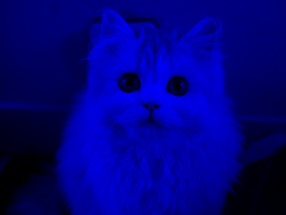

In [2]:
(defn filter-buffer! [image _mod]
  (let [ total (* 3 (.total image))
         bytes (byte-array total)]
         (.get image 0 0 bytes)
         (doseq[^int i (range 0 total)]
          (if (not (= 0 (mod (+ i _mod) 3)))
            (aset-byte bytes i 0)))
        (.put image 0 0 bytes)
        image))



(->
  "resources/chapter02/emilie1.jpg"
  (imread)
  (u/resize-by 0.07)
  (filter-buffer! 0)
  (u/>>>))

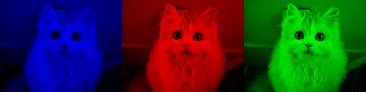

In [3]:
(def source 
  (->
  "resources/chapter02/emilie1.jpg"
  (imread)
  (u/resize-by 0.03)))

(->> (range 0 3)
  	 (map #(filter-buffer! (clone source) %) )
	 (hconcat!)
     (u/>>>))

### color filtering

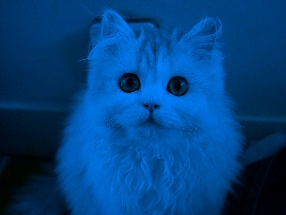

In [4]:
(->
  "resources/chapter02/emilie1.jpg"
  (imread)
  (u/resize-by 0.07)
  (multiply! (u/matrix-to-mat-of-double [ [1.0 0.5 0.0]] ))
  (u/>>>))

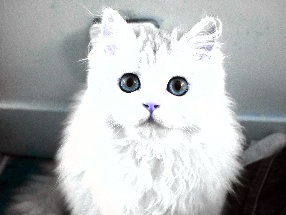

In [5]:
(->
  "resources/chapter02/emilie1.jpg"
  (imread)
  (u/resize-by 0.07)
  (cvt-color! COLOR_BGR2HSV)
  (multiply! (u/matrix-to-mat-of-double [ [1.0 1.0 1.5]] ))
  (cvt-color! COLOR_HSV2RGB)
  (u/>>>))

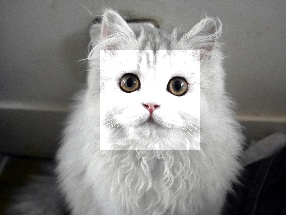

In [6]:
(def img (->
  "resources/chapter02/emilie1.jpg"
  (imread)
  (u/resize-by 0.07)))
  

(-> img
  (submat (new-rect 100 50 100 100))
  (cvt-color! COLOR_RGB2HLS)
  (multiply! (u/matrix-to-mat-of-double [ [1.0 1.3 1.3]] ))
  (cvt-color! COLOR_HLS2RGB))

(u/>>> img)

In [7]:

(defn apply-custom-kernel [ src target matrix ]
  (let [kernel (u/matrix-to-mat matrix)]
    (filter-2-d src target -1 kernel)))

(defn apply-custom-kernel! [ src matrix ]
  (let [target (u/mat-from src)
        kernel (u/matrix-to-mat matrix)]
    (filter-2-d src target -1 kernel)
    target))

#'whispering-willow/apply-custom-kernel!

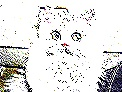

In [8]:
(-> source 
    clone 
    (apply-custom-kernel!  
      [[17.8824    -43.5161    4.11935]
       [ 3.45565    27.1554    -3.86714]
       [ 0.0299566   0.184309   1.46709]])
    (u/>>>))

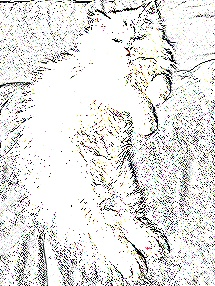

In [9]:
(-> "resources/chapter02/emilie4.jpg"
    (imread)
    (u/resize-by 0.07) 
    (filter-2-d! -1 (u/matrix-to-mat 
   [[17.8824    -43.5161     4.11935]
     [ -3.45565    27.1554    -3.86714]
     [ 0.0299566   0.184309   -1.46709]]))
    (bitwise-not!)
    (u/>>>))

In [11]:
(def m (new-mat 3 3 CV_8UC1 (new-scalar 200.0)))
(u/>>> m)
(def s (submat m (new-rect 1 1 1 1)))
(filter-2-d! s -1 (u/matrix-to-mat 
      [[0 0 0]
       [0 0.25 0]
       [0 0 0]]))
(.dump m)

"[200, 200, 200;\n 200,  50, 200;\n 200, 200, 200]"

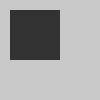

In [13]:
(def m (new-mat 100 100 CV_8UC1 (new-scalar 200.0)))
(u/>>> m)
(def s (submat m (new-rect 10 10 50 50)))
(filter-2-d! s -1 (u/matrix-to-mat 
      [[0 0 0]
       [0 0.25 0]
       [0 0 0]]))
(u/>>> m)

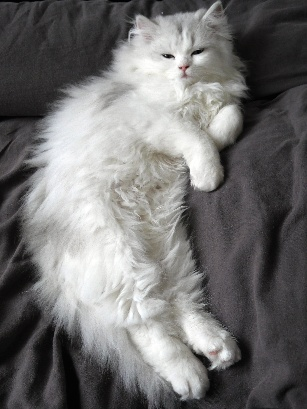

In [14]:
(-> "resources/chapter02/emilie4.jpg"
    (imread)
    (u/resize-by 0.1) 
    (filter-2-d! -1 (u/matrix-to-mat 
      [[0 0 0]
       [0 1 0]
       [0 0 0]]))
    (u/>>>))

(-> "resources/chapter02/emilie4.jpg"
    (imread)
    (u/resize-by 0.1) 
    (u/>>>))

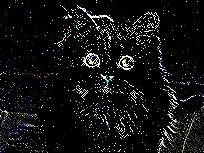

In [15]:
(-> 
   "resources/chapter02/emilie1.jpg"
   (imread)
   (u/resize-by 0.05)
   (filter-2-d! -1  (u/matrix-to-mat 
    [[17.8824    -43.5161     4.11935]
     [ -3.45565    27.1554    -3.86714]
     [ 0.0299566   0.184309   -1.46709]]))
;  (bitwise-not!)
    (u/>>>))

### Blurring

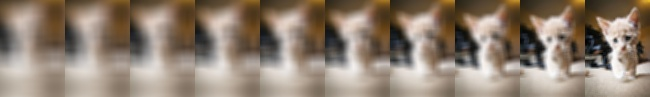

In [16]:
(defn apply-kernel-with [ src ind ]
  (let [
    ddepth -1 ; same as src
    delta 0
    anchor (new-point 1 1)
    kernel-size (+ 3 (* 2 (mod ind 10)))
    kernel (new-mat kernel-size kernel-size CV_32F)]
  (.dump kernel)
  (set-to kernel (new-scalar (/ 1.0 (* kernel-size kernel-size))))
  (filter-2-d! src ddepth kernel anchor delta BORDER_DEFAULT)))

(defn range-view [ img max ]
  (hconcat! (map #(apply-kernel-with (-> img clone) %) (reverse (range 0 max)))))

(-> "resources/chapter02/ai3.jpg"
  imread
  (u/resize-by 0.1)
  (range-view 10)
  (u/>>>))

In [17]:
(def m   (u/matrix-to-mat [[0 50 100] [100 150 200] [200 210 250]]))


(->
  (u/matrix-to-mat [[0 50 100] [100 150 200] [200 210 250]])
  (threshold! 150 250 THRESH_BINARY)
  (.dump))

(->
  (u/matrix-to-mat [[0 50 100] [100 150 200] [200 210 250]])
  (threshold! 150 250 THRESH_BINARY_INV)
  (.dump))

"[250, 250, 250;\n 250, 250, 0;\n 0, 0, 0]"

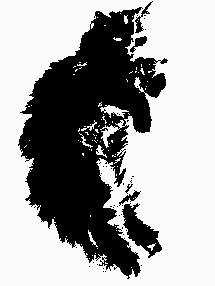

In [18]:
(-> "resources/chapter02/emilie4.jpg"
  (imread)
  (u/resize-by 0.07)
  (cvt-color! COLOR_BGR2GRAY)
  (threshold! 150 250 THRESH_BINARY_INV)
  (u/>>>))

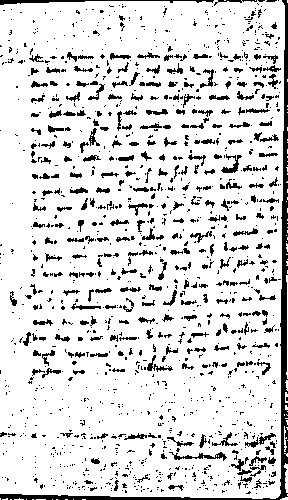

In [19]:
(-> "https://i.pinimg.com/originals/ff/20/c2/ff20c26a9b3cd04e81f894f0ac681926.jpg"
    (u/mat-from-url IMREAD_REDUCED_COLOR_4)
    (cvt-color! COLOR_BGR2GRAY)
    (median-blur! 5)
    (adaptive-threshold! 255 ADAPTIVE_THRESH_GAUSSIAN_C THRESH_BINARY 11 2)
    (u/>>>))

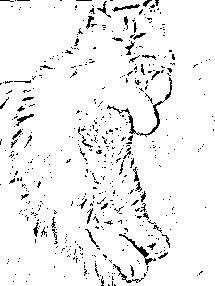

In [20]:
(-> "resources/chapter02/emilie4.jpg"
  (imread)
  (u/resize-by 0.07)
  (cvt-color! COLOR_BGR2GRAY)
  (adaptive-threshold! 255 ADAPTIVE_THRESH_MEAN_C THRESH_BINARY 9 20)
  (u/>>>))